In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip -q "/content/drive/MyDrive/research -dance /archive.zip"

replace test/108.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
import numpy as np
import keras

from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
# np.random.seed(2)

from keras.utils.np_utils import to_categorical

import itertools
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_path = "train/"
test_path = "test/"

kathak = "train/kathak/"
odissi = "train/odissi/"
sattriya = "train/sattriya/"

kathak_path = os.listdir(kathak)
sattriya_path = os.listdir(sattriya)
odissi_path = os.listdir(odissi)

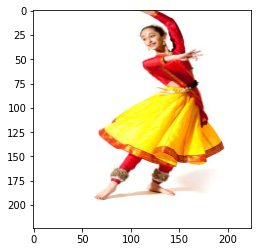

In [5]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (224, 224))
#     print(labels)
    return image[...,::-1]


plt.imshow(load_img(kathak + kathak_path[2]), cmap='gray')

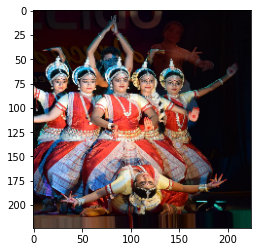

In [6]:
plt.imshow(load_img(odissi + odissi_path[2]), cmap='gray')

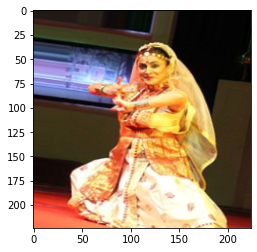

In [7]:
plt.imshow(load_img(sattriya + sattriya_path[9]), cmap='gray')


In [8]:
training_data = []
IMG_SIZE = 224

datadir = "train/"


categories = ['bharatanatyam', 'kathak', 'kathakali', 'kuchipudi',  'manipuri', 'mohiniyattam', 'odissi', 'sattriya']

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except:
                pass
create_training_data()

In [9]:
training_data = np.array(training_data)
print(training_data.shape)

(599, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [10]:
import random

np.random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

2
5
3
2
4
6
6
3
5
0


In [11]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [12]:
print(X.shape)
print(y.shape)

(599, 224, 224, 3)
(599,)


In [13]:
a,b = np.unique(y, return_counts = True)
print(a)
print(b)
print(categories)

[0 1 2 3 4 5 6 7]
[73 76 74 76 84 70 71 75]
['bharatanatyam', 'kathak', 'kathakali', 'kuchipudi', 'manipuri', 'mohiniyattam', 'odissi', 'sattriya']


In [14]:
import plotly.graph_objs as go 
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

trace = go.Bar(x = categories, y = b)
data = [trace]
layout = {"title":"Categories vs Images Distribution",
         "xaxis":{"title":"Categories","tickangle":0},
         "yaxis":{"title":"Number of Images"}}
fig = go.Figure(data = data,layout=layout)
iplot(fig)

In [15]:
X = X/255.0
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42)

In [16]:
train_datagenerator = ImageDataGenerator(

   rescale=1. / 255,

  featurewise_center=False,
  samplewise_center=False,
  featurewise_std_normalization=False, 
  samplewise_std_normalization=False,
  rotation_range=40,
  zoom_range = 0.20,
  width_shift_range=0.10,
  height_shift_range=2.18,
  horizontal_flip=True,
  vertical_flip=False)

val_datagenerator=ImageDataGenerator(
     rescale=1. /255
)
train_datagenerator.fit(X_train) 
val_datagenerator.fit(X_test)
X_train=np.array(X_train)
X_test=np.array (X_test)

In [17]:
print("Shape of train_x: ",X_train.shape)
print("Shape of train_y: ",y_train.shape)
print("Shape of test_x: ",X_test.shape)
print("Shape of test_y: ",y_test.shape)

Shape of train_x:  (551, 224, 224, 3)
Shape of train_y:  (551,)
Shape of test_x:  (48, 224, 224, 3)
Shape of test_y:  (48,)


In [18]:
y_train = to_categorical(y_train, num_classes = 8)
y_test = to_categorical(y_test, num_classes = 8)

In [19]:
print("Shape of test_x: ",X_train.shape)
print("Shape of train_y: ",y_train.shape)
print("Shape of test_x: ",X_test.shape)
print("Shape of test_y: ",y_test.shape)

Shape of test_x:  (551, 224, 224, 3)
Shape of train_y:  (551, 8)
Shape of test_x:  (48, 224, 224, 3)
Shape of test_y:  (48, 8)


In [20]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dropout,Activation
from keras.layers.core import Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D

# For interupt the training when val loss is stagnant
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
import itertools
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
model = keras.applications.VGG16(input_shape = (224,224,3), weights = 'imagenet',include_top=False)
for layer in model.layers:
    layer.trainable = False

last_layer = model.output

# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)

# add fully-connected & dropout layers
x = Dense(4096, activation='relu',name='fc-1')(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation='relu',name='fc-2')(x)
x = Dropout(0.2)(x)

# x = Dense(4096, activation='relu',name='fc-3')(x)
# x = Dropout(0.2)(x)

# a softmax layer for 8 classes
num_classes = 8
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

# this is the model we will train
model2 = Model(inputs=model.input, outputs=out)

model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
model2.compile(optimizer='adam',
              loss ='categorical_crossentropy',
              metrics=['accuracy'])

#early_stopping = EarlyStopping(monitor='val_loss', patience=3)


#hist = model2.fit(X_train,y_train, batch_size=30, epochs = 100, validation_data = (X_test,y_test), callbacks=[early_stopping])
hist = model2.fit(X_train,y_train, batch_size=30, epochs = 30, validation_data = (X_test,y_test))

Epoch 1/30
19/19 [==============================] - 8s 230ms/step - loss: 3.4962 - accuracy: 0.1901 - val_loss: 1.9910 - val_accuracy: 0.2083
Epoch 2/30
19/19 [==============================] - 2s 124ms/step - loss: 1.8560 - accuracy: 0.3518 - val_loss: 1.7229 - val_accuracy: 0.3542
Epoch 3/30
19/19 [==============================] - 2s 123ms/step - loss: 1.5016 - accuracy: 0.4466 - val_loss: 1.3908 - val_accuracy: 0.4792
Epoch 4/30
19/19 [==============================] - 2s 124ms/step - loss: 1.1637 - accuracy: 0.5774 - val_loss: 1.0031 - val_accuracy: 0.6875
Epoch 5/30
19/19 [==============================] - 2s 124ms/step - loss: 0.9531 - accuracy: 0.6619 - val_loss: 0.8708 - val_accuracy: 0.6250
Epoch 6/30
19/19 [==============================] - 2s 124ms/step - loss: 0.7209 - accuracy: 0.7598 - val_loss: 0.7552 - val_accuracy: 0.7083
Epoch 7/30
19/19 [==============================] - 2s 125ms/step - loss: 0.6689 - accuracy: 0.7881 - val_loss: 0.6223 - val_accuracy: 0.7708
Epoch 

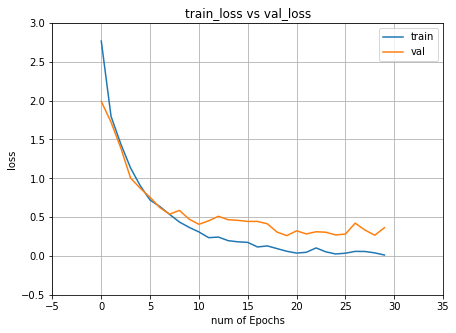

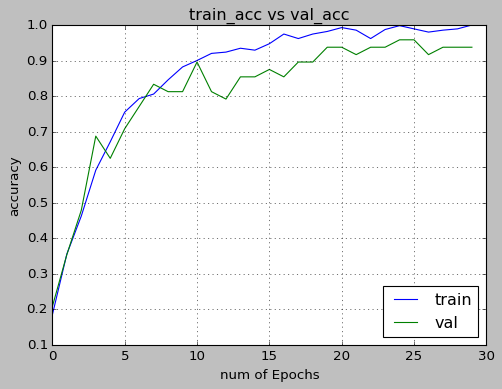

In [23]:

epochs = 30

# The uncomment everything in this cell and run it.

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [24]:
predicted = model2.predict(X_test)
predicted = np.argmax(predicted ,axis = 1)
original = np.argmax(y_test, axis= 1)

In [25]:
score = model2.evaluate(X_test, y_test, verbose=0)
print("val_loss = {:.3f} and val_acc = {:.3f}".format(score[0], score[1]))

val_loss = 0.365 and val_acc = 0.938


Confusion matrix, without normalization
[[5 0 0 0 1 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0]
 [0 0 0 5 0 0 1 0]
 [0 0 0 0 4 0 0 0]
 [0 1 0 0 0 6 0 0]
 [0 0 0 0 0 0 8 0]
 [0 0 0 0 0 0 0 8]]
Normalized confusion matrix
[[0.83 0.   0.   0.   0.17 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.83 0.   0.   0.17 0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.14 0.   0.   0.   0.86 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]]


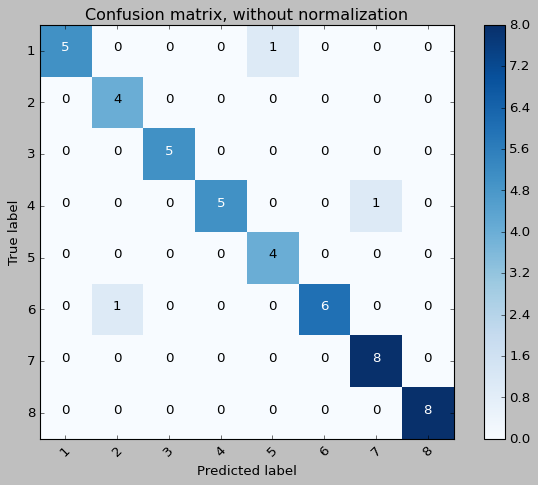

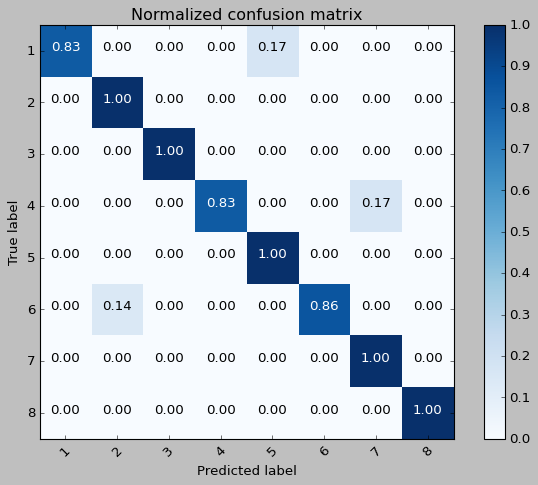

In [26]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(original, predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5,6,7,8],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5,6,7,8], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [27]:
model = keras.applications.VGG19(input_shape = (224,224,3), weights = 'imagenet',include_top=False)

for layer in model.layers:
    layer.trainable = False

last_layer = model.output
# add a global spatial average pooling layer


x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers
x = Dense(4096, activation='relu',name='fc-1')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu',name='fc-2')(x)
x = Dropout(0.5)(x)
# x = Dense(4096, activation='relu',name='fc-3')(x)
# x = Dropout(0.5)(x)

# a softmax layer for 8 classes
num_classes = 8
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

# this is the model we will train
model2 = Model(inputs=model.input, outputs=out)

model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [28]:
model2.compile(optimizer='adam',
              loss ='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=4)


hist = model2.fit(X_train,y_train, batch_size=30, epochs = 15, validation_data = (X_test,y_test))

Epoch 1/15
19/19 [==============================] - 4s 166ms/step - loss: 2.9099 - accuracy: 0.1491 - val_loss: 1.9804 - val_accuracy: 0.2500
Epoch 2/15
19/19 [==============================] - 3s 154ms/step - loss: 1.8647 - accuracy: 0.3440 - val_loss: 1.7643 - val_accuracy: 0.2708
Epoch 3/15
19/19 [==============================] - 3s 154ms/step - loss: 1.6914 - accuracy: 0.3406 - val_loss: 1.5337 - val_accuracy: 0.5000
Epoch 4/15
19/19 [==============================] - 3s 154ms/step - loss: 1.3344 - accuracy: 0.5379 - val_loss: 1.3602 - val_accuracy: 0.4167
Epoch 5/15
19/19 [==============================] - 3s 154ms/step - loss: 1.2609 - accuracy: 0.5782 - val_loss: 1.0526 - val_accuracy: 0.6042
Epoch 6/15
19/19 [==============================] - 3s 163ms/step - loss: 1.0320 - accuracy: 0.6125 - val_loss: 0.8794 - val_accuracy: 0.6250
Epoch 7/15
19/19 [==============================] - 3s 154ms/step - loss: 0.8865 - accuracy: 0.6613 - val_loss: 0.9221 - val_accuracy: 0.6667
Epoch 

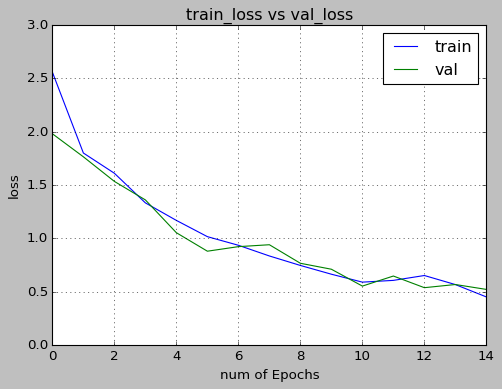

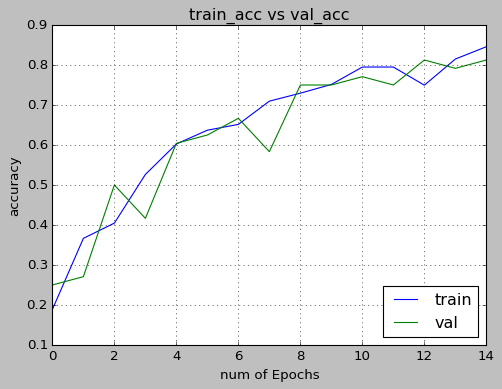

In [29]:



epochs = 15 # should be equal to the number of epochs that the training had took place.
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [30]:

model = keras.applications.Xception(input_shape = (224,224,3), weights = 'imagenet',include_top=False)
model.summary()

for layer in model.layers:
	layer.trainable = False

last_layer = model.output
# add a global spatial average pooling layer


x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers


x = Dense(4096, activation='relu',name='fc-1')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu',name='fc-2')(x)
x = Dropout(0.2)(x)


# a softmax layer for 8 classes
num_classes = 8
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

# this is the model we will train
model2 = Model(inputs=model.input, outputs=out)

model2.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [31]:
model2.compile(optimizer='adam',
              loss ='categorical_crossentropy',
              metrics=['accuracy'])

hist = model2.fit(X_train,y_train, batch_size=10, epochs = 30, validation_data = (X_test, y_test))

Epoch 1/20
56/56 [==============================] - 6s 71ms/step - loss: 3.5472 - accuracy: 0.2649 - val_loss: 1.8487 - val_accuracy: 0.4167
Epoch 2/20
56/56 [==============================] - 3s 54ms/step - loss: 1.2533 - accuracy: 0.5771 - val_loss: 1.1235 - val_accuracy: 0.6667
Epoch 3/20
56/56 [==============================] - 3s 51ms/step - loss: 0.8821 - accuracy: 0.7305 - val_loss: 0.8607 - val_accuracy: 0.6875
Epoch 4/20
56/56 [==============================] - 3s 51ms/step - loss: 0.5075 - accuracy: 0.8404 - val_loss: 0.7927 - val_accuracy: 0.7292
Epoch 5/20
56/56 [==============================] - 3s 51ms/step - loss: 0.5684 - accuracy: 0.8034 - val_loss: 0.6856 - val_accuracy: 0.7708
Epoch 6/20
56/56 [==============================] - 3s 51ms/step - loss: 0.5161 - accuracy: 0.8172 - val_loss: 0.6999 - val_accuracy: 0.7708
Epoch 7/20
56/56 [==============================] - 3s 51ms/step - loss: 0.4302 - accuracy: 0.8637 - val_loss: 0.8628 - val_accuracy: 0.7292
Epoch 8/20
56

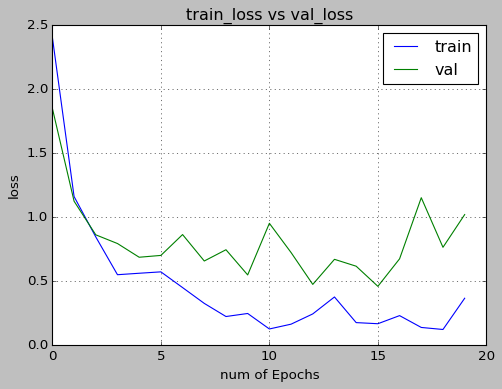

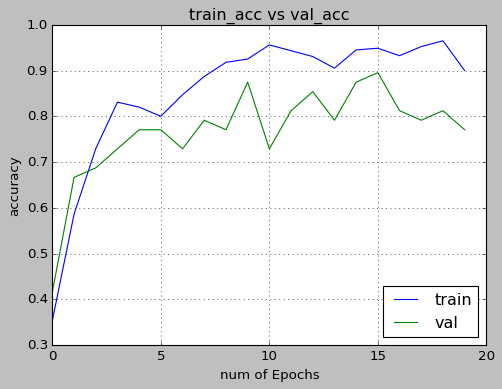

In [32]:
epochs = 30
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)


plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])